# The Kelly Criterion - "The Fundamental Theory of Investing"

This is an educational repo explaining the Kelly Criterion and related
investment concepts.

Excellent information on the Kelly Criterion can be found at:

- [Kelly Criterion on Wikipedia](https://en.wikipedia.org/wiki/Kelly_criterion)
- [Fortune's Formula](https://archive.org/details/fortunesformulau00poun/page/n3/mode/2up) - a book by William Poundstone.

*To read the formulas as they are meant to appear, please visit the
[Kelly-Criterion](http://mckoss.com/kelly-criterion/) hosted version
of this repository.*

# What is it?

This simple formula:

<div style="text-align: center; font-size: 2rem;">

$f = p - \frac{1 - p}{b}$

</div>

answers an amazingly complex question:

> Given a chance to place a bet, at a given odds (payoff for a win), and a given
> probability of winning; how much of my money (stake) should I put at risk each
> time I place a bet?

It is assumed that if you lose the bet, you all the money you placed on that
bet.  And if you win, you gain `b` dollars (as well as returning your original
bet to you.

## Simple Example

Suppose someone offers to let you bet on the flip of a (fair) coin.  And further,
they will pay you TWICE your bet when you win (and take your bet when you lose).

If you start with $100 - how much should you risk on each (or a series) of bets?

First, we should recognize that this is a VERY GOOD deal - and you should always
want to play this game.   One way of understanding wether a bet is in your
favor is to look at the **expected** value of the bet, $d$, - the probability of
winning times how much you'd win minus the probability of losing time how
much you'd lose.

<div style="text-align: center; font-size: 2rem;">

$$\begin{aligned}
E &= p \cdot (b \cdot d) - (1 - p) \cdot d \\
  &= \frac{1}{2} \cdot 2 \cdot d - \frac{1}{2} \cdot d \\
  &= \frac{d}{2}
\end{aligned}$$

</div>

In other words, each time you play, you *expect* to gain $\frac{1}{2}$ the size
of your bet.  But that doesn't mean you should bet everything at once.  Because
if you lose your whole stake - you'd no longer be able to play.

Before going on, let's define the variables in the Kelly Criterion:

- **$f$** - The *fraction* of your stake you should place on each bet (where
  0 means never bet, and 1 means bet everything you have).
- **$p$** - The probability that you'll win the bet (and therefore, $1-p$ is the
  probability of losing the bet).
- **$b$** - The *odds* given to you (the size of the payoff in case of a win -
  expressed as a multiple of your bet size); so betting $1 will return $b
  dollars to you.

What does the Kelly formula recommend you do in this case?

<div style="text-align: center; font-size: 2rem;">


$$\begin{aligned}
f &= p - \frac{1 - p}{b} \\
  &= 0.5 - \frac{0.5}{2} \\
  &= 0.25
\end{aligned}$$

</div>

So, the optimal first bet would be for $25 of our $100 stake.

*Note that the
Kelly formula tells us that under **no circumstances** should we risk more
than the proportion of our stake greater than the probability of
**winning** a bet - no matter how high the payout.*


In [127]:
# Simulation of 100 consecutive bets.

from random import random
import matplotlib.pyplot as plt

def coin_flips(n):
  return [random() < 0.5 for _ in range(n)]

def sim(f, flips):
  stake = 100
  balance = [stake]

  for heads in flips:
    bet = int(stake * f)
    if heads:
      stake += 2 * bet
    else:
      stake -= bet
    balance.append(stake)
  
  return balance

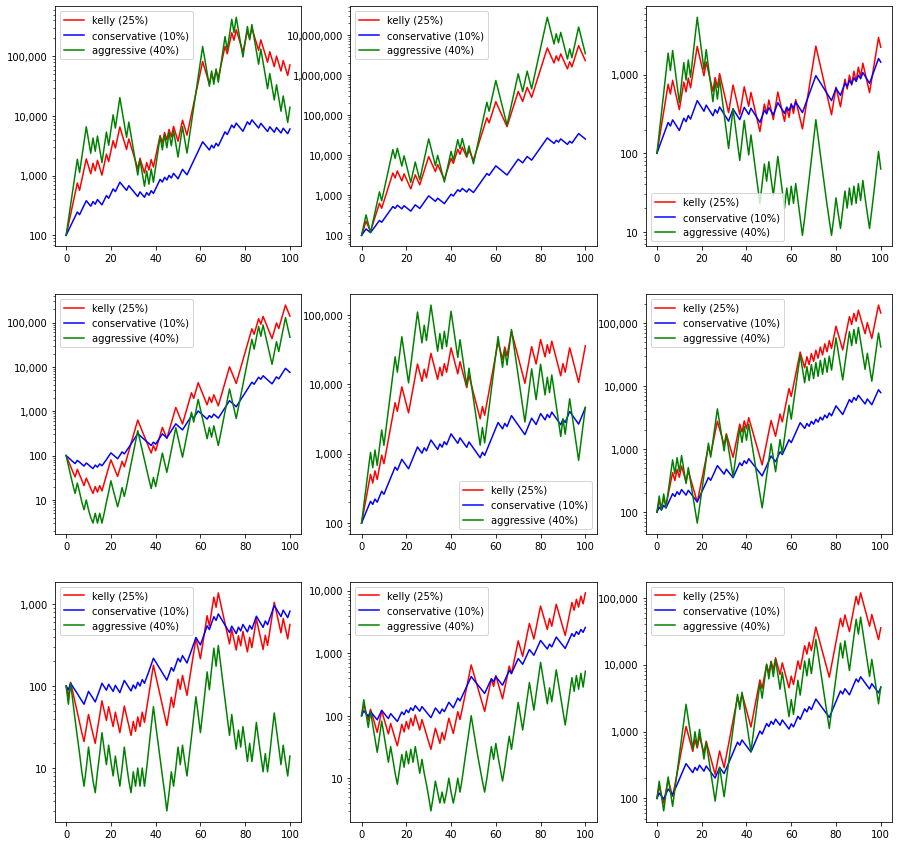

In [173]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, axs = plt.subplots(3, 3, figsize=(15,15))

for rw in range(3):
  for col in range(3):
    flips = coin_flips(100)
    ax = axs[rw, col]
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.plot(sim(0.25, flips), 'r', label='kelly (25%)')
    ax.plot(sim(0.1, flips), 'b', label="conservative (10%)")
    ax.plot(sim(0.4, flips), 'g', label="aggressive (40%)")
    ax.legend()


All the simulations above share the same "market conditions" - i.e., the
sequence of coin flips is the same for the graphs in each chart.  You can
see that the aggressive fraction (green) is occasionally wiped our (or
nearly wiped out) in some scenarios.